# **Data Profiling**

## **Importing Data**

Sebagai langkah pertama yang harus dilakukan adalah inisialisasi Library dan mengimport dataset tersebut ke dalam Python menggunakan library Pandas dan diassign sebagai retail_raw.

In [ ]:
import pandas as pd
import numpy as np
import io
import pandas_profiling
retail_raw = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced_data_quality.csv')

## **Inspeksi tipe data**
Dengan library Pandas, dapat menjalankan fungsi .dtypes untuk melihat data untuk setiap kolom termasuk tipe datanya.



In [ ]:
print(retail_raw.dtypes)

order_id         int64
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object


## **Descriptive Statistics**

Di bagian ini, aku akan mempelajari berbagai statistik deskriptif yang dapat digunakan untuk lebih memahami struktur data.

**Length**

Fungsi len menghitung jumlah pengamatan dalam suatu series / column. Fungsi len akan menghitung semua pengamatan, terlepas dari apakah ada null-value atau tidak (include missing value).

In [ ]:
# Kolom city
length_city = len(retail_raw['city'])
print('Length kolom city:', length_city)
# Tugas Praktek: Kolom product_id
length_product_id = len(retail_raw['product_id'])
print('Length kolom product_id:',length_product_id)

Length kolom city: 5000
Length kolom product_id: 5000


**Count**

Fungsi count menghitung jumlah pengamatan non-NA / non-null dalam suatu series / column. Fungsi len akan hanya menghitung elemen dari kolom yang mempunyai nilai (exclude missing value).

In [ ]:
# Count kolom city
count_city = retail_raw['city'].count()
print('Count kolom count_city:', count_city)
# Tugas praktek: count kolom product_id
count_product_id = retail_raw['product_id'].count()
print('Count kolom product_id:', count_product_id)

Count kolom count_city: 4984
Count kolom product_id: 4989


**Missing Value**

Dengan Length dan Count, sekarang dapat menghitung jumlah missing-value. Jumlah nilai yang hilang adalah perbedaan antara Length dan Count.

In [ ]:
# Missing value pada kolom city
number_of_missing_values_city = length_city - count_city
float_of_missing_values_city = float(number_of_missing_values_city/length_city)
pct_of_missing_values_city = '{0:.1f}%'.format(float_of_missing_values_city * 100)
print('Persentase missing value kolom city:', pct_of_missing_values_city)

# Tugas praktek: Missing value pada kolom product_id
number_of_missing_values_product_id = length_product_id - count_product_id
float_of_missing_values_product_id = float(number_of_missing_values_product_id/length_product_id)
pct_of_missing_values_product_id = '{0:.1f}%'.format(float_of_missing_values_product_id * 100)
print('Persentase missing value kolom product_id:', pct_of_missing_values_product_id)

Persentase missing value kolom city: 0.3%
Persentase missing value kolom product_id: 0.2%


**Maximum dan Minimum**

Fungsi max dan min digunakan untuk mengetahui element terbesar dan terkecil dari suatu kolom di dataframe.

**Mean, Medium, Modus dan Standard Deviasi**

Fungsi mean, medium, modus dan standard deviasi digunakan untuk mengetahui pemusatan data dan persebarannya.

In [ ]:
# Deskriptif statistics kolom quantity
print('Kolom quantity')
print('Minimum value: ', retail_raw['quantity'].min())
print('Maximum value: ', retail_raw['quantity'].max())
print('Mean value: ', retail_raw['quantity'].mean())
print('Mode value: ', retail_raw['quantity'].mode())
print('Median value: ', retail_raw['quantity'].median())
print('Standard Deviation value: ', retail_raw['quantity'].std())

# Tugas praktek: Deskriptif statistics kolom item_price
print('')
print('Kolom item_price')
print('Minimum value: ', retail_raw['item_price'].min())
print('Maximum value: ', retail_raw['item_price'].max())
print('Mean value: ', retail_raw['item_price'].mean())
print('Median value: ', retail_raw['item_price'].median())
print('Standard Deviation value: ', retail_raw['item_price'].std())

**Quantile Statistics**

Quantiles adalah titik potong yang membagi distribusi dalam ukuran yang sama. Jika akan membagi distribusi menjadi empat grup yang sama, kuantil yang dibuat dinamai quartile. Jika dibagi kedalam 10 sepuluh group yang sama dinamakan percentile. Dalam kasus di bawah ini, ingin membagi distribusi menjadi empat grup atau quartile.

In [ ]:
# Quantile statistics kolom quantity
print('Kolom quantity:')
print(retail_raw['quantity'].quantile([0.25, 0.5, 0.75]))

# Tugas praktek: Quantile statistics kolom item_price
print('')
print('Kolom item_price:')
print(retail_raw['item_price'].quantile([0.25, 0.5, 0.75]))

Kolom quantity:
0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64

Kolom item_price:
0.25     450000.0
0.50     604000.0
0.75    1045000.0
Name: item_price, dtype: float64


**Correlation**

Korelasi adalah cara yang tepat untuk menemukan hubungan antara variabel numerik. Koefisien korelasi berkisar antara -1 hingga 1. Korelasi 1 adalah korelasi positif total, korelasi -1 adalah korelasi negatif total dan korelasi 0 adalah korelasi non-linear.

In [ ]:
print('Korelasi quantity dengan item_price')
print(retail_raw[['quantity', 'item_price']].corr())

Korelasi quantity dengan item_price
            quantity  item_price
quantity    1.000000   -0.133936
item_price -0.133936    1.000000


# **Data Cleansing**

## **Missing Data**
Dataset yang ditemui di real-world biasanya akan memiliki banyak missing value. Kemampuan untuk treatment missing value sangat penting karena jika membiarkan missing value itu dapat memengaruhi analisis dan machine learning model. Sehingga jika menemukan nilai yang hilang dalam dataset, harus melakukan treatment sedemikian rupa. Cara check kolom yang mempunyai missing value:

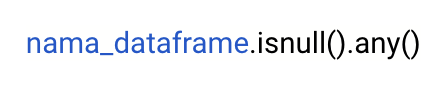


Cara treatment terhadap missing-value antara lain:


1. Leave as it is (dibiarkan)
2. Filling the missing value (imputasi)
3. Drop them (hapus row yang mengandung missing value)
 


Imputasi merupakan suatu metode treatment terhadap missing value dengan mengisinya menggunakan teknik tertentu. Bisa menggunakan mean, modus ataupun menggunakan predictive modelling. Pada modul ini akan membahas mengenai pemanfaatan function fillna dari Pandas untuk imputasi ini, yaitu


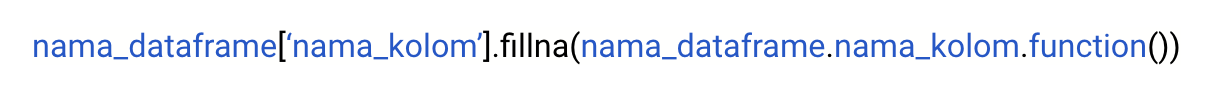

In [ ]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw['quantity'].mean()))

# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool

Filling the missing value (imputasi):
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64

Drop missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


## **Outliers**
Mari melihat penggunaannya pada dataframe retail_raw untuk kolom quantity:

In [ ]:
# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1 - 1.5 * IQR)) | (retail_raw['quantity'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (5000, 9)
Shape akhir:  (4699, 9)


## **Deduplikasi Data**
Mari melihat penggunaannya pada dataframe retail_raw :

In [ ]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

# Buang data yang terduplikasi
retail_raw.drop_duplicates(inplace=True)

# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (4699, 9)
Shape akhir:  (4692, 9)


# **Case Studi: Data Profiling**

Tolong proses dataset terlampir yang  disimpan dalam bentuk csv bernama 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/uncleaned_raw.csv'.

Kamu bisa memprosesnya dengan cara berikut:

Import dataset csv ke variable bernama uncleaned_raw
Inspeksi dataframe uncleaned_raw
Check kolom yang mengandung missing value, jika ada, kolom apakah itu dan berapa persen missing value pada kolom tersebut?
Mengisi missing value tersebut dengan mean dari kolom tersebut!
Setelah membaca email tersebut, aku pun memulai kode programnya di code editor.

In [ ]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/uncleaned_raw.csv')

#inspeksi dataframe uncleaned_raw
print('Lima data teratas:')
print(uncleaned_raw.head())

#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:')
print(uncleaned_raw.isnull().any())

#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty)

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100)

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

Lima data teratas:
   InvoiceNo                          Description  ...  CustomerID      City
0     536365   WHITE HANGING HEART T-LIGHT HOLDER  ...       17850  Surabaya
1     536366                  WHITE METAL LANTERN  ...       17850  Surabaya
2     536367       CREAM CUPID HEARTS COAT HANGER  ...       17850  Surabaya
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE  ...       17850   Jakarta
4     536369       RED WOOLLY HOTTIE WHITE HEART.  ...       17850     Medan

[5 rows x 7 columns]

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool
Persentase missing value kolom Quantity: 4.0%


## **Case Study: Data Cleansing - Part 1**
Untuk memprosesnya bisa dilakukan dengan cara berikut:

Mengetahui kolom yang memiliki outliers! Gunakan visualisasi dengan boxplot pada dataframe uncleaned_raw.


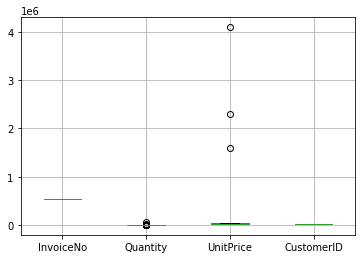

In [ ]:
import matplotlib.pyplot as plt

#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

## **Case Study: Data Cleansing - Part 2**
Langkah selanjutnya bisa dilakukan dengan cara berikut:

Melakukan proses removing outliers pada kolom UnitPrice.
Checking duplikasi and melakukan deduplikasi dataset tersebut!


In [ ]:
#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1 - 1.5 * IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3 + 1.5 * IQR)))]

#check for duplication
print(uncleaned_raw.duplicated(subset=None))

#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool
